<h1 align="center"> Project By Qaisar Abbas </h1>


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [4]:
# Load Laptop Dataset
data = pd.read_csv('./Laptops_Price_Predictor_Dataset.csv', encoding='latin-1')

### EDA & Data Cleaning of Dataset

In [5]:
data.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg      2537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg      1803.60

In [88]:
data.shape

(1303, 12)

In [89]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Summary

In [179]:
data.describe()

Ram       Weight  Price_euros  Touchscreen         Ips  \
count  1302.000000  1302.000000  1302.000000  1302.000000  1302.00000   
mean      8.385561     2.039415  1124.043894     0.146697     0.27957   
std       5.085166     0.665274   699.158856     0.353940     0.44896   
min       2.000000     0.690000   174.000000     0.000000     0.00000   
25%       4.000000     1.500000   599.000000     0.000000     0.00000   
50%       8.000000     2.040000   978.000000     0.000000     0.00000   
75%       8.000000     2.300000  1488.435000     0.000000     1.00000   
max      64.000000     4.700000  6099.000000     1.000000     1.00000   

       Company_Acer  Company_Apple  Company_Asus  Company_Dell   Company_HP  \
count   1302.000000    1302.000000   1302.000000   1302.000000  1302.000000   
mean       0.079109       0.016129      0.121352      0.228111     0.210445   
std        0.270013       0.126020      0.326661      0.419776     0.407782   
min        0.000000       0.000000      0.000000      0.000000     0.000000   
25%        0.000000       0.000000      0.000000      0.000000     0.000000   
50%        0.000000       0.000000      0.000000      0.000000     0.000000   
75%        0.000000       0.000000      0.000000      0.000000     0.000000   
max        1.000000       1.000000      1.000000      1.000000     1.000000   

       ...  OpSys_Other  OpSys_Windows  cpu_name_AMD  cpu_name_Intel Core i3  \
count  ...  1302.000000    1302.000000   1302.000000             1302.000000   
mean   ...     0.072197       0.864055      0.047619                0.104455   
std    ...     0.258913       0.342862      0.213041                0.305967   
min    ...     0.000000       0.000000      0.000000                0.000000   
25%    ...     0.000000       1.000000      0.000000                0.000000   
50%    ...     0.000000       1.000000      0.000000                0.000000   
75%    ...     0.000000       1.000000      0.000000                0.000000   
max    ...     1.000000       1.000000      1.000000                1.000000   

       cpu_name_Intel Core i5  cpu_name_Intel Core i7  cpu_name_Other  \
count             1302.000000             1302.000000     1302.000000   
mean                 0.324885                0.404762        0.118280   
std                  0.468512                0.491035        0.323063   
min                  0.000000                0.000000        0.000000   
25%                  0.000000                0.000000        0.000000   
50%                  0.000000                0.000000        0.000000   
75%                  1.000000                1.000000        0.000000   
max                  1.000000                1.000000        1.000000   

       gpu_name_AMD  gpu_name_Intel  gpu_name_Nvidia  
count   1302.000000     1302.000000      1302.000000  
mean       0.138249        0.554531         0.307220  
std        0.345294        0.497208         0.461519  
min        0.000000        0.000000         0.000000  
25%        0.000000        0.000000         0.000000  
50%        0.000000        1.000000         0.000000  
75%        0.000000        1.000000         1.000000  
max        1.000000        1.000000         1.000000  

[8 rows x 32 columns]

In [91]:
data.duplicated().sum()

0

In [92]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### Features Engineering

In [7]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')

In [94]:
data.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69  
1        Intel HD Graphics 6000  macOS    1.34       898.94  
2         Intel HD Graphics 620  No OS    1.86       575.00  
3            AMD Radeon Pro 455  macOS    1.83      2537.45  
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60

In [8]:
data.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

### Company Column

In [9]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt

In [10]:
data['Company'] = data['Company'].apply(add_company)

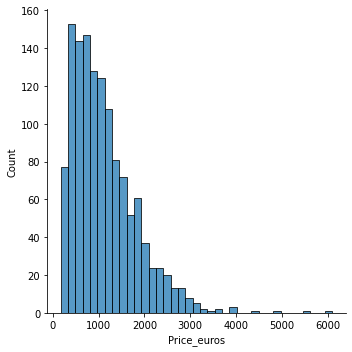

In [98]:
sns.displot(data['Price_euros'])

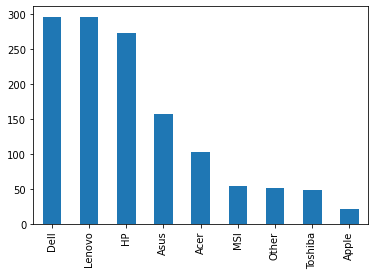

In [99]:
data['Company'].value_counts().plot(kind='bar')

In [100]:
data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

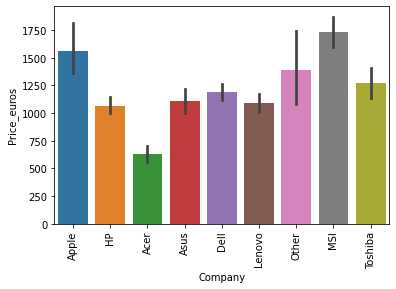

In [101]:
sns.barplot(x = data['Company'], y = data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### TypeName Column

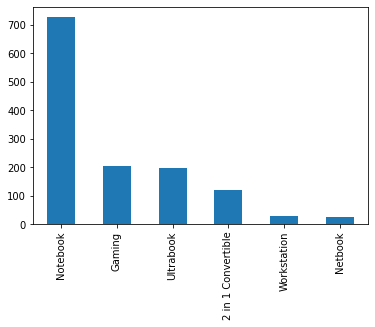

In [102]:
data['TypeName'].value_counts().plot(kind='bar')

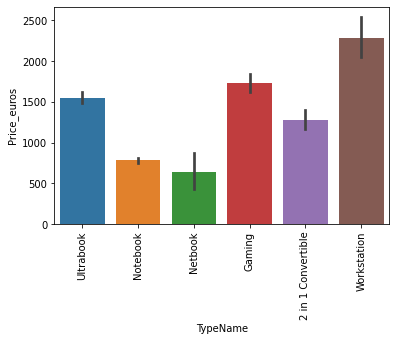

In [103]:
sns.barplot(x = data['TypeName'],y = data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### Inches Column

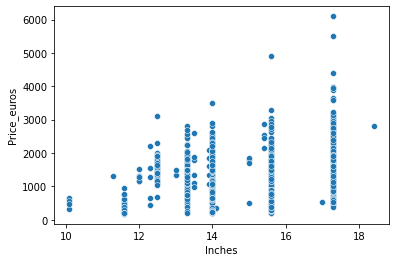

In [105]:
sns.scatterplot(x=data['Inches'],y=data['Price_euros'])

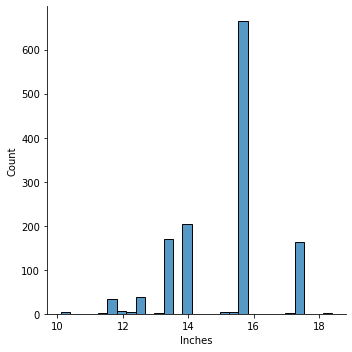

In [104]:
sns.displot(data['Inches'])

### TypeName Column 

In [107]:
data['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

### ScreenResolution Column 

In [108]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [11]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [110]:
data.sample(10)

laptop_ID Company                                Product   TypeName  \
1261       1279    Asus                   ZenBook UX305CA-UBM1  Ultrabook   
384         390    Asus                           Zenbook Flip  Ultrabook   
1109       1124    Asus                     Rog GL552VW-CN470T     Gaming   
459         466      HP    17-BS092ND (i3-6006U/8GB/256GB/W10)   Notebook   
874         885   Other                             Notebook 9  Ultrabook   
333         339  Lenovo  V310-15ISK (i3-6006U/4GB/1TB/FHD/W10)   Notebook   
216         221  Lenovo                      IdeaPad 320-17IKB   Notebook   
833         842  Lenovo                          Thinkpad T460   Notebook   
1162       1180      HP                    Pavilion 15-cb003nv     Gaming   
989        1003    Dell                          Latitude 5480   Notebook   

      Inches                 ScreenResolution                          Cpu  \
1261    13.3      IPS Panel Full HD 1920x1080     Intel Core M 6Y30 0.9GHz   
384     13.3  Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
1109    15.6      IPS Panel Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz   
459     17.3                         1600x900     Intel Core i3 6006U 2GHz   
874     15.0                Full HD 1920x1080   Intel Core i7 7500U 2.7GHz   
333     15.6                Full HD 1920x1080     Intel Core i3 6006U 2GHz   
216     17.3                         1600x900   Intel Core i5 7200U 2.5GHz   
833     14.0                Full HD 1920x1080   Intel Core i5 6200U 2.3GHz   
1162    15.6      IPS Panel Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   
989     14.0                Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   

      Ram                       Gpu       OpSys  Weight  Price_euros  \
1261    8     Intel HD Graphics 515  Windows 10    1.20        729.0   
384    16     Intel HD Graphics 620  Windows 10    1.10       1748.9   
1109   16   Nvidia GeForce GTX 960M  Windows 10    2.59       1339.0   
459     8     Intel HD Graphics 520  Windows 10    2.50        639.9   
874    16      Nvidia GeForce 940MX  Windows 10    1.23       1849.0   
333     4     Intel HD Graphics 520  Windows 10    1.85        449.0   
216     8  Nvidia GeForce GTX 940MX       No OS    2.80        589.0   
833     8     Intel HD Graphics 520  Windows 10    1.70       1186.0   
1162    8   Nvidia GeForce GTX 1050  Windows 10    2.62        899.0   
989     8    Intel HD Graphics 620   Windows 10    1.60       1119.0   

      Touchscreen  Ips  
1261            0    1  
384             1    0  
1109            0    1  
459             0    0  
874             0    0  
333             0    0  
216             0    0  
833             0    0  
1162            0    1  
989             0    0

### Cpu Column 

In [111]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [12]:
data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [113]:
data['cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [13]:
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [14]:
data['cpu_name'] = data['cpu_name'].apply(set_processor)

In [116]:
data['cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: cpu_name, dtype: int64

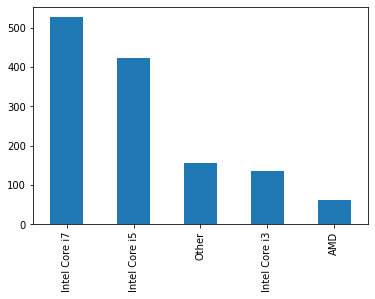

In [117]:
data['cpu_name'].value_counts().plot(kind='bar')

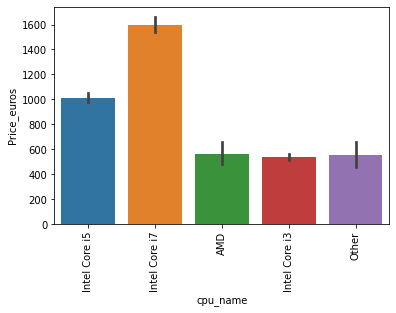

In [118]:
sns.barplot(x=data['cpu_name'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### Ram Column 

In [120]:
data['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

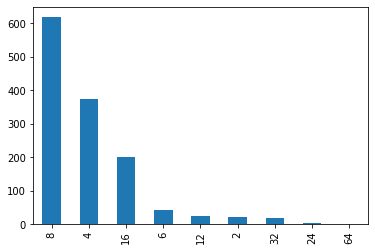

In [121]:
data['Ram'].value_counts().plot(kind='bar')

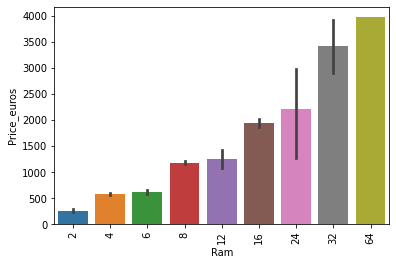

In [122]:
sns.barplot(x=data['Ram'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### Gpu Column 

In [123]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [15]:
data['gpu_name'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [125]:
data['gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_name, dtype: int64

In [126]:
data.shape

(1303, 16)

In [16]:
data = data[data['gpu_name'] != 'ARM']

In [128]:
data.shape

(1302, 16)

In [129]:
data.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                            Gpu  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69            0    1   
1        Intel HD Graphics 6000  macOS    1.34       898.94            0    0   
2         Intel HD Graphics 620  No OS    1.86       575.00            0    0   
3            AMD Radeon Pro 455  macOS    1.83      2537.45            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60            0    1   

        cpu_name gpu_name  
0  Intel Core i5    Intel  
1  Intel Core i5    Intel  
2  Intel Core i5    Intel  
3  Intel Core i7      AMD  
4  Intel Core i5    Intel

### OpSys Column 

In [130]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [17]:
def set_os(inpt):
    if inpt == 'Windows 10' or inpt == 'Windows 7' or inpt == 'Windows 10 S':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS X':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'Other'

In [18]:
data['OpSys'] = data['OpSys'].apply(set_os)

In [133]:
data['OpSys'].value_counts()

Windows    1125
Other        94
Linux        62
Mac          21
Name: OpSys, dtype: int64

In [134]:
data.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                            Gpu  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640    Mac    1.37      1339.69            0    1   
1        Intel HD Graphics 6000    Mac    1.34       898.94            0    0   
2         Intel HD Graphics 620  Other    1.86       575.00            0    0   
3            AMD Radeon Pro 455    Mac    1.83      2537.45            0    1   
4  Intel Iris Plus Graphics 650    Mac    1.37      1803.60            0    1   

        cpu_name gpu_name  
0  Intel Core i5    Intel  
1  Intel Core i5    Intel  
2  Intel Core i5    Intel  
3  Intel Core i7      AMD  
4  Intel Core i5    Intel

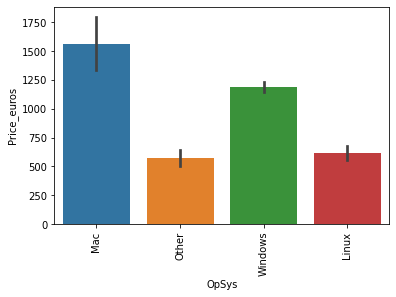

In [135]:
sns.barplot(x=data['OpSys'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

### Corelation Prices

In [19]:
data.corr()['Price_euros']

laptop_ID      0.068632
Inches         0.067329
Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
Ips            0.253320
Name: Price_euros, dtype: float64

<AxesSubplot:>

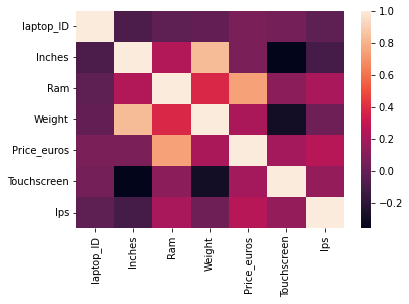

In [20]:
# HeatMap with data corelations
sns.heatmap(data.corr())

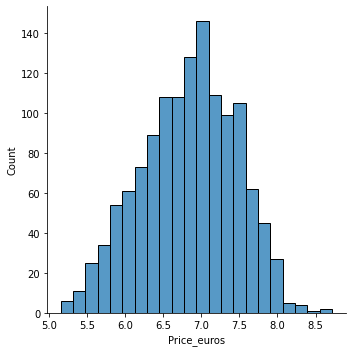

In [138]:
sns.displot(np.log(data['Price_euros']))

### Drop Unnecessary Columns 

In [139]:
data = data.drop(columns=['laptop_ID', 'Inches', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'])

In [140]:
data.head()

Company   TypeName  Ram  OpSys  Weight  Price_euros  Touchscreen  Ips  \
0   Apple  Ultrabook    8    Mac    1.37      1339.69            0    1   
1   Apple  Ultrabook    8    Mac    1.34       898.94            0    0   
2      HP   Notebook    8  Other    1.86       575.00            0    0   
3   Apple  Ultrabook   16    Mac    1.83      2537.45            0    1   
4   Apple  Ultrabook    8    Mac    1.37      1803.60            0    1   

        cpu_name gpu_name  
0  Intel Core i5    Intel  
1  Intel Core i5    Intel  
2  Intel Core i5    Intel  
3  Intel Core i7      AMD  
4  Intel Core i5    Intel

### One-Hot Encoding 

In [141]:
data = pd.get_dummies(data)

In [142]:
data.head()

Ram  Weight  Price_euros  Touchscreen  Ips  Company_Acer  Company_Apple  \
0    8    1.37      1339.69            0    1             0              1   
1    8    1.34       898.94            0    0             0              1   
2    8    1.86       575.00            0    0             0              0   
3   16    1.83      2537.45            0    1             0              1   
4    8    1.37      1803.60            0    1             0              1   

   Company_Asus  Company_Dell  Company_HP  ...  OpSys_Other  OpSys_Windows  \
0             0             0           0  ...            0              0   
1             0             0           0  ...            0              0   
2             0             0           1  ...            1              0   
3             0             0           0  ...            0              0   
4             0             0           0  ...            0              0   

   cpu_name_AMD  cpu_name_Intel Core i3  cpu_name_Intel Core i5  \
0             0                       0                       1   
1             0                       0                       1   
2             0                       0                       1   
3             0                       0                       0   
4             0                       0                       1   

   cpu_name_Intel Core i7  cpu_name_Other  gpu_name_AMD  gpu_name_Intel  \
0                       0               0             0               1   
1                       0               0             0               1   
2                       0               0             0               1   
3                       1               0             1               0   
4                       0               0             0               1   

   gpu_name_Nvidia  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 32 columns]

In [143]:
data.shape

(1302, 32)

## Machine Learning Modeling

In [144]:
X = data.drop('Price_euros', axis=1)
y = data['Price_euros']

### Divide Dataset Into Training & Testing Set 

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [146]:
X_train

Ram  Weight  Touchscreen  Ips  Company_Acer  Company_Apple  \
844     8    1.54            0    0             0              0   
129     8    2.50            0    0             0              0   
395     4    1.91            0    0             0              0   
791     4    1.22            0    0             0              0   
707    16    2.18            0    0             0              0   
...   ...     ...          ...  ...           ...            ...   
644     4    2.40            0    0             1              0   
173     4    2.00            0    0             0              0   
923    16    2.40            0    1             0              0   
1188    8    1.23            1    0             0              0   
1282    2    1.17            0    0             0              0   

      Company_Asus  Company_Dell  Company_HP  Company_Lenovo  ...  \
844              0             0           1               0  ...   
129              0             0           1               0  ...   
395              0             0           1               0  ...   
791              0             0           0               0  ...   
707              0             0           0               1  ...   
...            ...           ...         ...             ...  ...   
644              0             0           0               0  ...   
173              0             0           0               0  ...   
923              0             0           0               0  ...   
1188             0             1           0               0  ...   
1282             0             0           1               0  ...   

      OpSys_Other  OpSys_Windows  cpu_name_AMD  cpu_name_Intel Core i3  \
844             0              1             0                       0   
129             0              1             0                       0   
395             0              1             1                       0   
791             0              1             0                       0   
707             0              1             0                       0   
...           ...            ...           ...                     ...   
644             0              1             0                       1   
173             0              1             0                       1   
923             0              1             0                       0   
1188            0              0             0                       0   
1282            0              1             0                       0   

      cpu_name_Intel Core i5  cpu_name_Intel Core i7  cpu_name_Other  \
844                        0                       1               0   
129                        1                       0               0   
395                        0                       0               0   
791                        0                       0               1   
707                        0                       1               0   
...                      ...                     ...             ...   
644                        0                       0               0   
173                        0                       0               0   
923                        0                       1               0   
1188                       1                       0               0   
1282                       0                       0               1   

      gpu_name_AMD  gpu_name_Intel  gpu_name_Nvidia  
844              0               1                0  
129              0               1                0  
395              1               0                0  
791              0               1                0  
707              0               0                1  
...            ...             ...              ...  
644              0               1                0  
173              0               1                0  
923              0               0                1  
1188             0               1                0  
1282        

In [147]:
y_train

844     1870.0
129      928.0
395      499.0
791      202.9
707     1855.0
         ...  
644      450.0
173      489.0
923     1975.0
1188    1099.0
1282     209.0
Name: Price_euros, Length: 976, dtype: float64

In [148]:
X_train.shape, X_test.shape

((976, 31), (326, 31))

### Model Training 

In [168]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

### Linear Regression

In [169]:
lr = LinearRegression()
model_acc(lr)

LinearRegression() --> 0.702684505830523


### Lasso Regression 

In [170]:
lasso = Lasso()
model_acc(lasso)

Lasso() --> 0.7070076564746945


### Decision Tree Regression

In [171]:
dt = DecisionTreeRegressor()
model_acc(dt)

DecisionTreeRegressor() --> 0.6398767968793273


### Random Forcast Regression

In [172]:
rf = RandomForestRegressor()
model_acc(rf)

RandomForestRegressor() --> 0.7737955431476989


### Hyperparameter Tunning 

In [173]:
parameters = {'n_estimators':[10, 50, 100],'criterion':['squared_error','absolute_error','poisson']}
grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_model = grid_fit.best_estimator_
best_model.score(X_test, y_test)

0.7965280228664186

In [174]:
X_test.columns

Index(['Ram', 'Weight', 'Touchscreen', 'Ips', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'cpu_name_AMD', 'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')

### Export Trained Model 

In [177]:
with open('Laptop_Price_Predictor_Model.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
pred_value = best_model.predict([[8, 1.3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]])
pred_value